# 1. 선 그래프 (Line Graph) 그리기
## 1.1 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x,y 의 인수는 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 size는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.

## 1.2 선 스타일
- https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

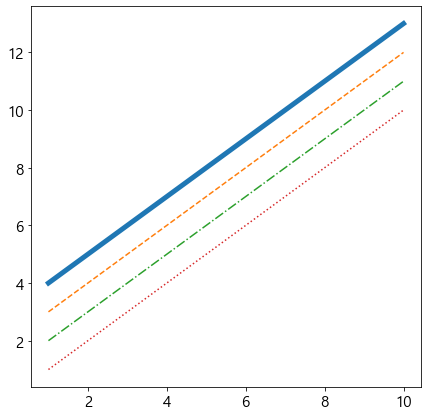

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = np.linspace(1,10, num=100)
plt.figure(figsize=(7,7))

plt.plot(x,x+3, linewidth=5)
plt.plot(x, x+2, linestyle='--')
plt.plot(x, x+1, linestyle='-.')
plt.plot(x, x, linestyle=':')
plt.show()

## 1.3 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv')
df.shape

(12, 7)

In [10]:
df.head()

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도(㎍/㎥/시)
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354


In [11]:
df.rename({'최대농도(㎍/㎥/시)':'최대농도'}, axis=1, inplace=True)
#{df.columns[-1]:'최대농도'} 이렇게 싸용가능

In [12]:
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


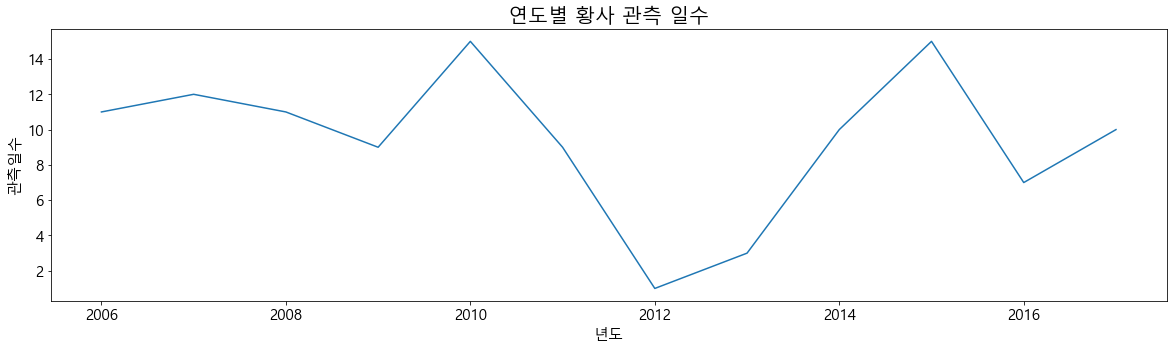

In [13]:
# 년도에 따른 관측일수의 변화 흐름
plt.figure(figsize=(20,5))
# x축: 시작-년도, y축: 값-관측일수
plt.plot(df['년도'],df['관측일수'])
plt.title('연도별 황사 관측 일수')
plt.xlabel('년도')
plt.ylabel('관측일수')
plt.show()

In [14]:
# 년도에 따른 주의보와 경보 발령횟수를 한 plot에 그리기

In [15]:

# plt.figure(figsize=(15,10))


# plt.subplot(2,1,1)
# plt.plot(df['년도'],df['주의보 발령횟수'],label='주의보발령횟수')
# plt.title('연도별 주의보 발령일수')
# plt.xlabel('년도')
# plt.ylabel('발령횟수')


# plt.subplot(2,1,2)
# plt.plot(df['년도'],df['경보 발령횟수'],label='경보발령횟수')
# plt.title('연도별 경보 발령횟수')
# plt.xlabel('년도')
# plt.ylabel('발령횟수')

# plt.legend()
# plt.tight_layout()
# plt.show()

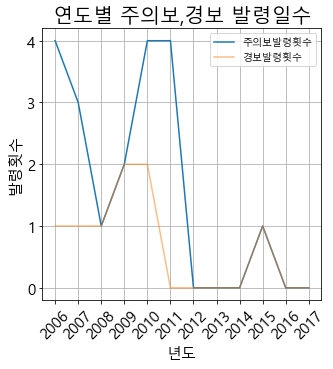

In [16]:
plt.figure(figsize=(5,5))
plt.plot(df['년도'],df['주의보 발령횟수'],label='주의보발령횟수')
plt.plot(df['년도'],df['경보 발령횟수'],label='경보발령횟수',alpha=0.5) # alpha:투명도 - 0:투명 ~ 1:불투명

# ticks 설정
plt.xticks(df['년도'], rotation=45) # 45도 각도로 tick을 설정.
plt.yticks(range(0,5))
#plt.yticks(df['주의보 발령횟수'])



plt.title('연도별 주의보,경보 발령일수')
plt.xlabel('년도')
plt.ylabel('발령횟수')



plt.legend()
plt.grid(True)
plt.show()

In [17]:
df['주의보 발령횟수'].unique()

array([4, 3, 1, 2, 0], dtype=int64)

### legend box 위치 지정
- loc="수직방향위치 수평방향위치"
    - axes box내에 legend box를 위치시킬때 사용
    - 수직방향위치: lower, upper, center
    - 수평방향위치: left, right, center
- bbox_to_anchor, loc
    - axes box 밖에 legend box를 위치시킬때 사용.
    - bbox_to_anchor: 0 ~ 1사이 실수. legend box를 axes box 기준 어디에 둘것인지를 지정.(x축위치,y축위치)
    - loc: legend box를 axes box의 어느부분을 기준으로 놓을 것인지.

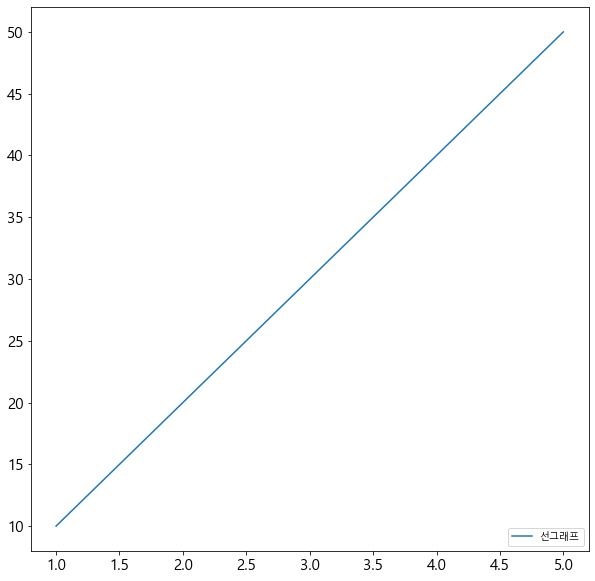

In [18]:
plt.figure(figsize=(10,10))
plt.plot([1,2,3,4,5],[10,20,30,40,50], label='선그래프')

plt.legend(loc="lower right")
plt.legend(bbox_to_anchor=(1,0),loc='lower right')
plt.show()

## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 선그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

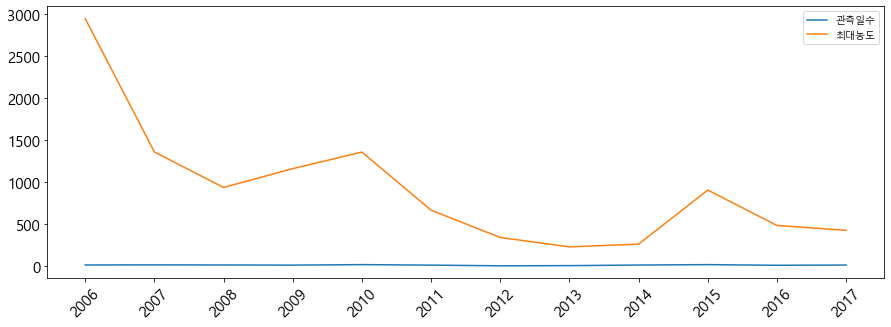

In [26]:
plt.figure(figsize=(15,5))
#값의 차이가 클때.
plt.plot(df['년도'],df['관측일수'], label='관측일수')
plt.plot(df['년도'],df['최대농도'], label='최대농도')

plt.xticks(df['년도'],rotation=45)


plt.legend()
plt.show()

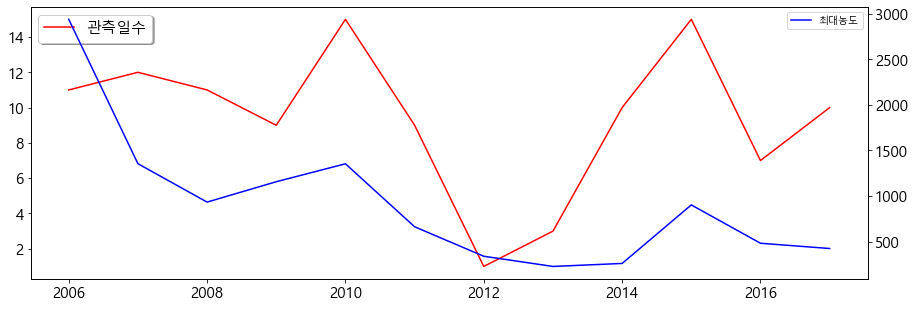

In [24]:
fig, ax1 = plt.subplots(figsize=(15,5)) #행, 열개수를 생략 -> axes(subplot) 1개

ax2 = ax1.twinx() # ax와 x축을 공유하는 쌍둥이 axes

ax1.plot(df['년도'],df['관측일수'], label='관측일수', color='r')
# twinx,y로 공유시 default색은 같다.
ax2.plot(df['년도'],df['최대농도'], label='최대농도', color='b')

ax1.legend(loc="upper left", fontsize=15, fancybox=True,shadow=True, ncol=2)
ax2.legend(loc="upper right")
plt.show()

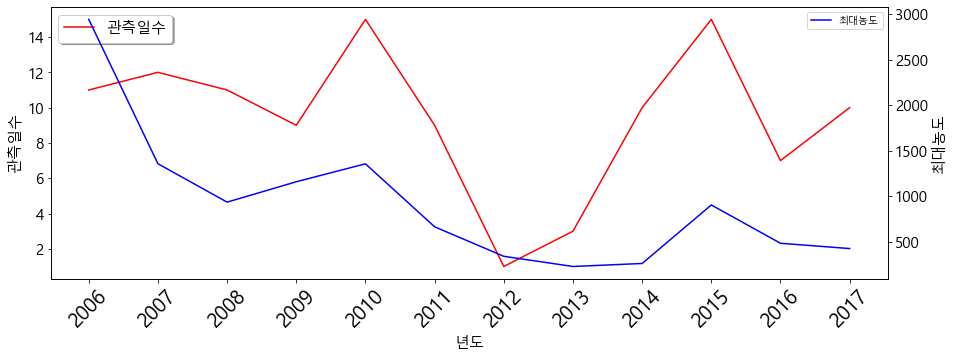

In [29]:
fig, ax1 = plt.subplots(figsize=(15,5)) #행, 열개수를 생략 -> axes(subplot) 1개

ax2 = ax1.twinx() # ax와 x축을 공유하는 쌍둥이 axes

ax1.plot(df['년도'],df['관측일수'], label='관측일수', color='r')
ax2.plot(df['년도'],df['최대농도'], label='최대농도', color='b')

ax1.set_xlabel('년도')
ax1.set_ylabel('관측일수')
ax2.set_ylabel('최대농도')


ax1.set_xticks(df['년도'])
ax1.tick_params(axis='x', labelrotation=45, labelsize=20)



ax1.legend(loc="upper left", fontsize=15, fancybox=True,shadow=True, ncol=2)
ax2.legend(loc="upper right")
plt.show()

# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 상관성이나 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x값, 2번인수 y값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
    - x,y 의 인수는 스칼라 실수나 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 원소의 수는 같아야 한다.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
x = np.arange(1, 1000, 50)
y = np.arange(1, 1000, 50)
z = np.arange(1, 1000, 20)
a = np.random.normal(10,5, size= 20)
print(x.shape)

(20,)


In [36]:
for d in zip(x,y):
    print(d)

(1, 1)
(51, 51)
(101, 101)
(151, 151)
(201, 201)
(251, 251)
(301, 301)
(351, 351)
(401, 401)
(451, 451)
(501, 501)
(551, 551)
(601, 601)
(651, 651)
(701, 701)
(751, 751)
(801, 801)
(851, 851)
(901, 901)
(951, 951)


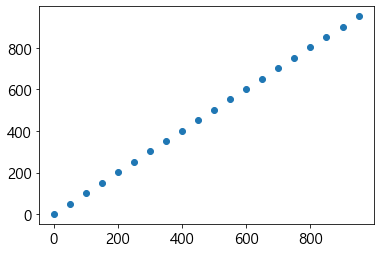

In [32]:
plt.scatter(x,y)
plt.show()

ValueError: x and y must be the same size

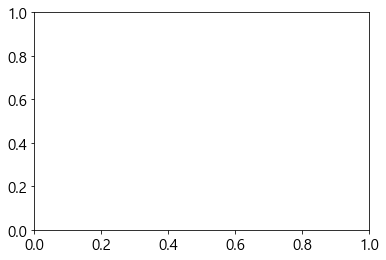

In [34]:
plt.scatter(x,z) # x, y 축에 들어가는 값들의 개수는 동일해야함.

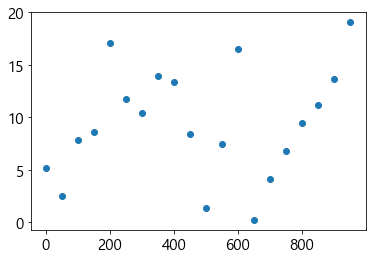

In [37]:
plt.scatter(x, a)
plt.show()

In [39]:
a


array([ 5.22917193,  2.56373476,  7.85611235,  8.59687331, 17.04234855,
       11.72677109, 10.39753537, 13.91663852, 13.32972678,  8.45457602,
        1.42183547,  7.44612322, 16.53283807,  0.24370669,  4.1559512 ,
        6.76242246,  9.43947071, 11.17351484, 13.67744426, 19.06366388])

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
    - scatter() 메소드의 marker 매개변수를 이용해 변경한다. 
    - https://matplotlib.org/api/markers_api.html
- s
    - 마커의 크기
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)

<function matplotlib.pyplot.show(close=None, block=None)>

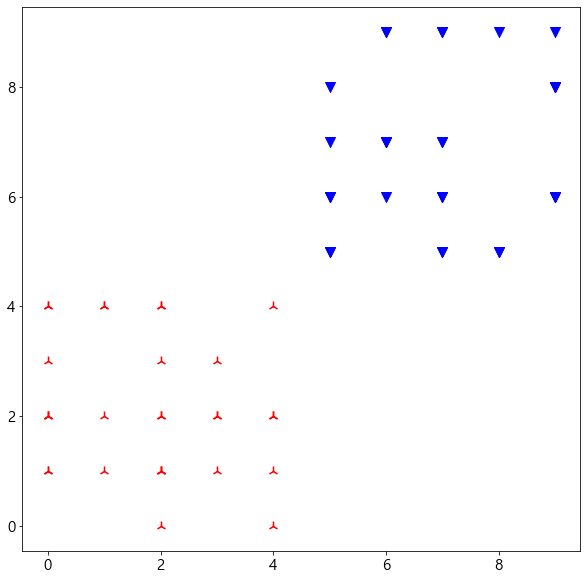

In [57]:

plt.figure(figsize=(10,10))

plt.scatter(x = np.random.randint(0,5,30),
            y = np.random.randint(0,5,30),
           marker = '2', 
            s = 100,
           color = 'r')

plt.scatter(x = np.random.randint(5,10,30),
            y = np.random.randint(5,10,30),
           marker = 'v', 
            s = 100,
           color = 'b')
plt.show


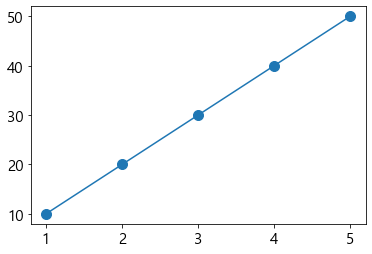

In [65]:
plt.plot([1,2,3,4,5],[10,20,30,40,50], marker='o', markersize=10)
#plt.scatter([1,2,3,4,5],[10,20,30,40,50])
plt.show()

## 2.3 산점도 활용

In [66]:
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


### 경보 발령횟수와 관측일수 간의 관계

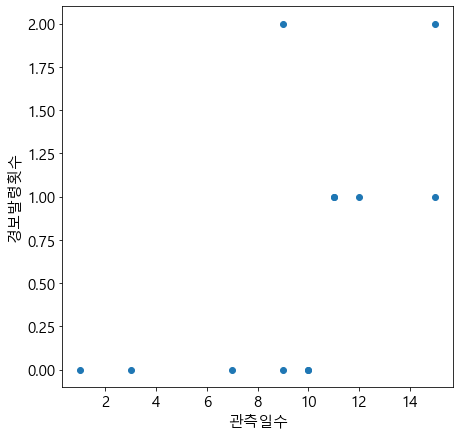

In [76]:
plt.figure(figsize=(7,7))
plt.scatter(df['관측일수'],df['경보 발령횟수'])
plt.xlabel('관측일수')
plt.ylabel('경보발령횟수')
plt.show()

In [ ]:
- 상관계수
    - 두 변수(컬럼) 간의 상관관계를 계산한 값.
    - 양의 상관관계: 변수 하나의 값이 증가할 때 다른 하나도 같이 증가.
        - 0 ~ 1 (양수)
    - 음의 상관관계: 변수 하난의 값이 증가할 때 다른 하나는 감소.
        - -1 ~ 0 (음수)
    - numpy.corrcoef(변수, 변수) - 변수는 array_like(배열, list, Series)
    - pd.corr()
        - -1 ~ 1
        - 1 ~ 0.7 : 아주 강한 상관관계
        - 0.7 ~ 0.3 : 강한 상관관계
        - 0.3 ~ 0.1 : 약한 상관관계
        - 0.1 ~ 0: 관계없다

In [79]:
corr = np.corrcoef(df['관측일수'],df['경보 발령횟수'])
corr

array([[1.        , 0.60416124],
       [0.60416124, 1.        ]])

In [77]:
df[['관측일수','경보 발령횟수']].corr()

,관측일수,경보 발령횟수
관측일수,1.000000,0.604161
경보 발령횟수,0.604161,1.000000


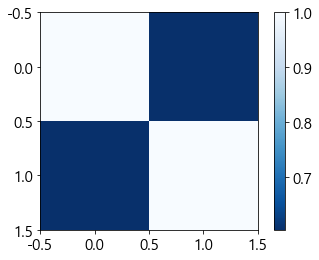

In [94]:
# 상관관계를 heatmap으로 시각화
plt.imshow(corr, cmap='Blues_r')
plt.colorbar()
plt.show()

In [95]:
df.corr()

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
년도,1.000000,-0.706913,-0.612401,-0.582975,-0.501745,-0.201694,-0.733651
주의보 발령횟수,-0.706913,1.000000,0.975781,0.562544,0.566468,0.515552,0.735472
주의보 발령일수,-0.612401,0.975781,1.000000,0.468807,0.484182,0.477142,0.623823
경보 발령횟수,-0.582975,0.562544,0.468807,1.000000,0.968246,0.604161,0.587026
경보 발령일수,-0.501745,0.566468,0.484182,0.968246,1.000000,0.611976,0.645936
관측일수,-0.201694,0.515552,0.477142,0.604161,0.611976,1.000000,0.471453
최대농도,-0.733651,0.735472,0.623823,0.587026,0.645936,0.471453,1.000000


In [115]:
df2 = df.corr()
df3 = df2.loc[df2.columns[::-1],df2.columns[::-1]]
df3

,최대농도,관측일수,경보 발령일수,경보 발령횟수,주의보 발령일수,주의보 발령횟수,년도
최대농도,1.000000,0.471453,0.645936,0.587026,0.623823,0.735472,-0.733651
관측일수,0.471453,1.000000,0.611976,0.604161,0.477142,0.515552,-0.201694
경보 발령일수,0.645936,0.611976,1.000000,0.968246,0.484182,0.566468,-0.501745
경보 발령횟수,0.587026,0.604161,0.968246,1.000000,0.468807,0.562544,-0.582975
주의보 발령일수,0.623823,0.477142,0.484182,0.468807,1.000000,0.975781,-0.612401
주의보 발령횟수,0.735472,0.515552,0.566468,0.562544,0.975781,1.000000,-0.706913
년도,-0.733651,-0.201694,-0.501745,-0.582975,-0.612401,-0.706913,1.000000


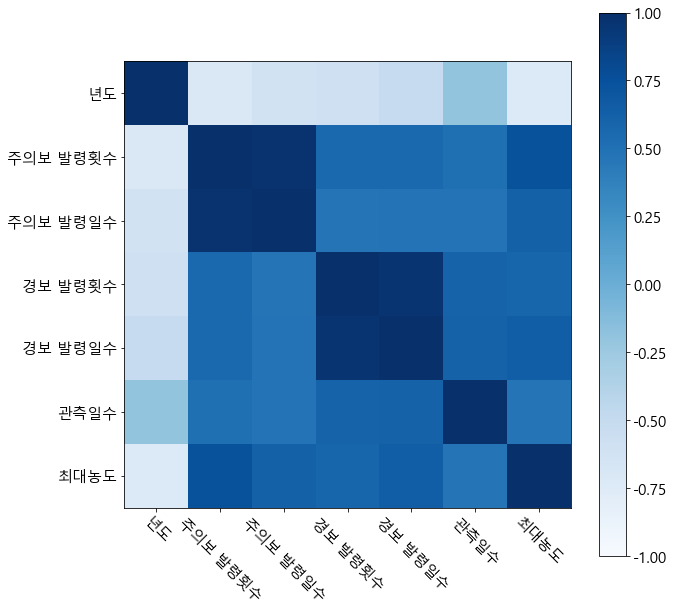

In [112]:
plt.figure(figsize=(10,10))
plt.imshow(df.corr(), cmap='Blues', vmin=-1, vmax=1) # vmin최소값, vmax최대값.

plt.yticks(ticks=range(df.columns.size),labels=df.columns) # 숫자대신 데이터프레임의 문자열로 표현
plt.xticks(ticks=range(df.columns.size),labels=df.columns, rotation= -45) # rotation으로 문자열 회전.

plt.colorbar() # 어떤색이 큰값인지 바형태로 표현.
plt.show()

In [98]:
plt.xticks?

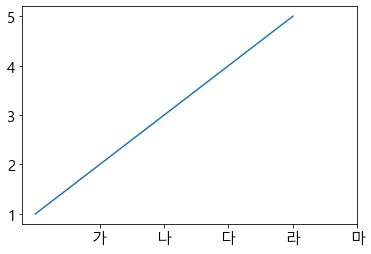

In [108]:
plt.plot([1,2,3,4,5])
#plt.xticks([10,20,30,40,50])
plt.xticks(ticks=[1,2,3,4,5],labels=['가','나','다','라','마'])
plt.show()

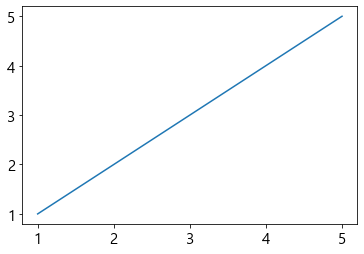

In [105]:
plt.plot([1,2,3,4,5],[1,2,3,4,5])

In [116]:
dia = pd.read_csv('data/diamonds.csv')
dia.shape

(53940, 10)

In [117]:
dia.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

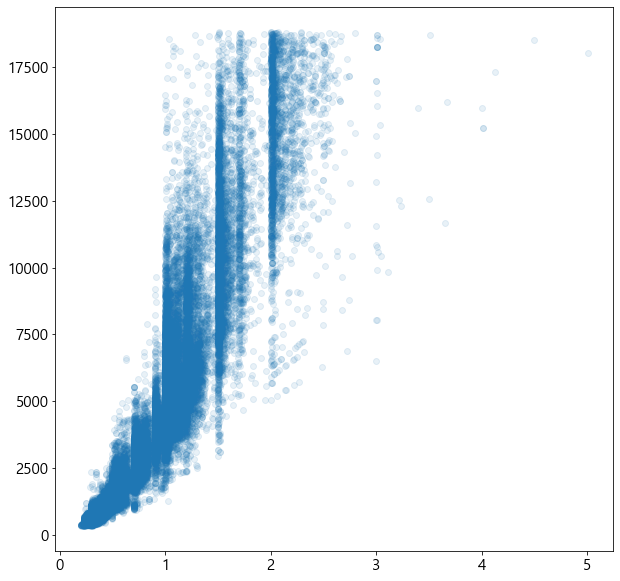

In [121]:
#carat과  price간의 관계를 산점도로 시각화
plt.figure(figsize=(10,10))
plt.scatter(dia['carat'],dia['price'], alpha=0.1)
plt.show()

In [126]:
dia[['carat','price']].corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량을 막대 형식으로 나타낸 그래프
- axes.bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- axes.barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비    

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fruits = ['pear','apple','melon']
amount = [10,15,5]


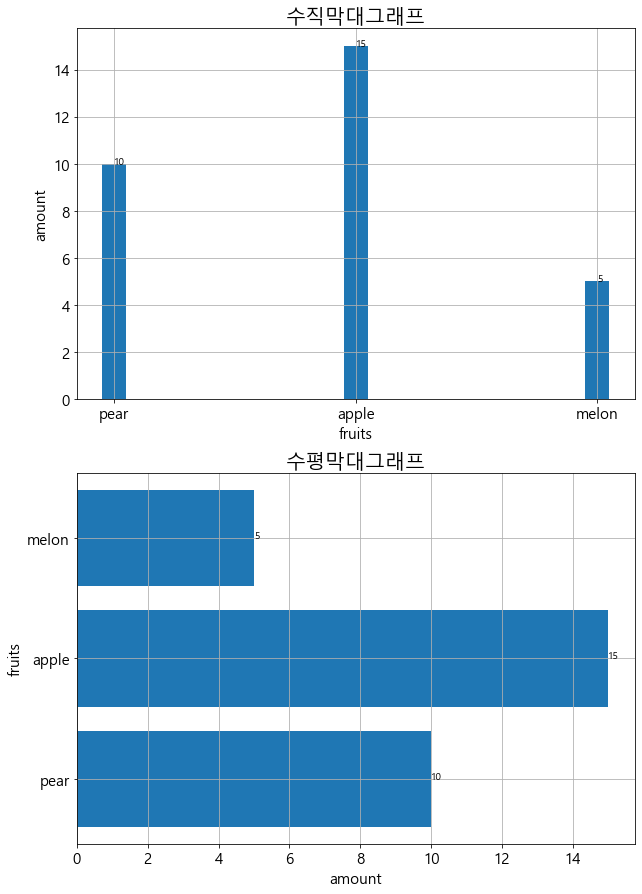

In [54]:
fig, axes = plt.subplots(2,1,figsize=(10,15))
axes[0].bar(fruits,amount, width=0.1) # 그래프 width 조절 0~1, default는 0.8, 1:두꺼움, 0: 얇음
axes[0].set_title('수직막대그래프')
axes[0].set_xlabel('fruits')
axes[0].set_ylabel('amount')
axes[0].grid(True)

#plt.bar(df.index,df[2009])


for idx, x in enumerate(amount):
    axes[0].text(idx,x,x)
axes[1].barh(fruits,amount, height=0.8)
axes[1].set_title('수평막대그래프')
axes[1].set_ylabel('fruits')
axes[1].set_xlabel('amount')
axes[1].grid(True)

for idx, x in zip(amount,fruits):
    axes[1].text(idx,x,idx)

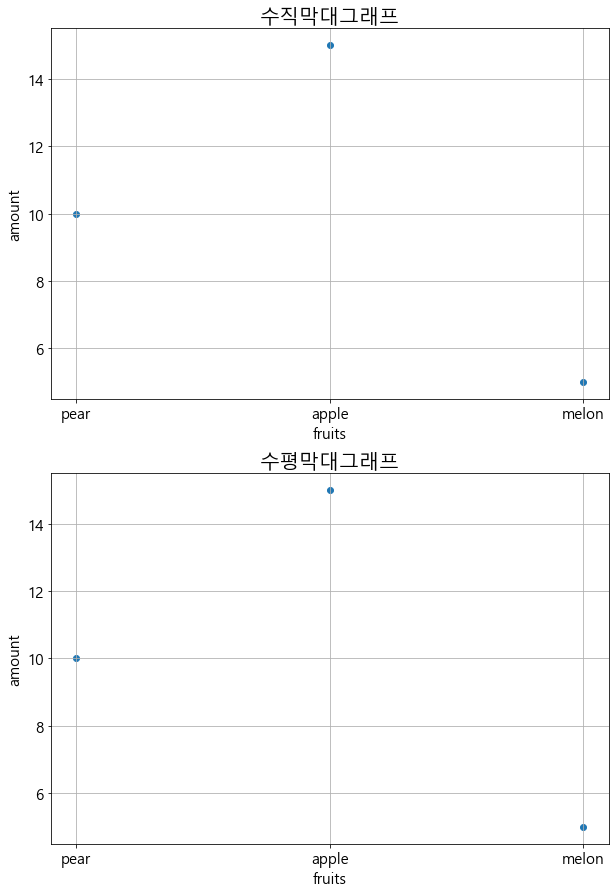

In [137]:
fig, axes = plt.subplots(2,1,figsize=(10,15))
axes[0].scatter(fruits,amount)
axes[0].set_title('수직막대그래프')
axes[0].set_xlabel('fruits')
axes[0].set_ylabel('amount')
axes[0].grid(True)

axes[1].scatter(fruits,amount)
axes[1].set_title('수평막대그래프')
axes[1].set_xlabel('fruits')
axes[1].set_ylabel('amount')
axes[1].grid(True)


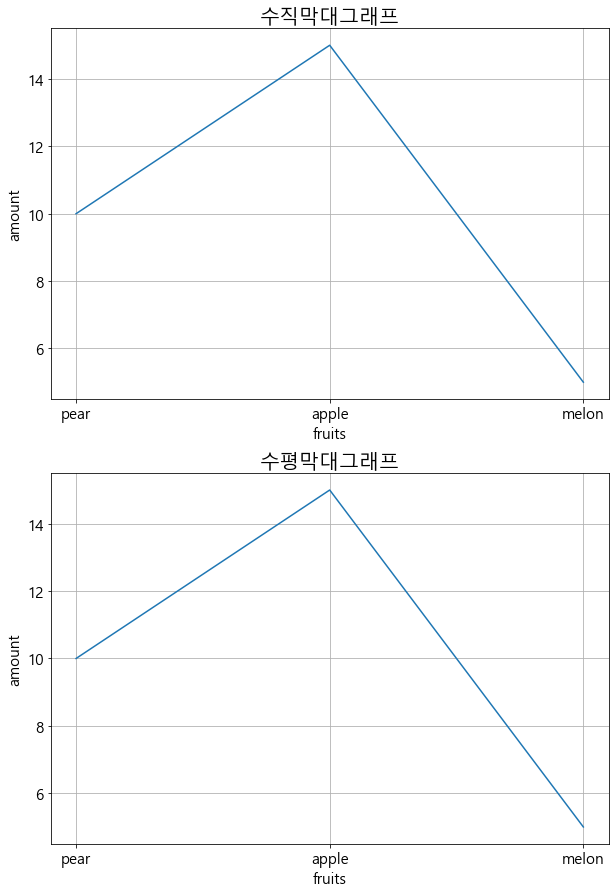

In [138]:
fig, axes = plt.subplots(2,1,figsize=(10,15))
axes[0].plot(fruits,amount)
axes[0].set_title('수직막대그래프')
axes[0].set_xlabel('fruits')
axes[0].set_ylabel('amount')
axes[0].grid(True)

axes[1].plot(fruits,amount)
axes[1].set_title('수평막대그래프')
axes[1].set_xlabel('fruits')
axes[1].set_ylabel('amount')
axes[1].grid(True)


## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)
- 2018년 계절별 강수량

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel('data/강수량.xlsx')
df

,계절,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
1,여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
2,가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
3,겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


In [12]:
df

,계절,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
1,여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
2,가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
3,겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


In [13]:
df.set_index('계절', inplace=True)
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


In [15]:
a = [200,700,140,140]

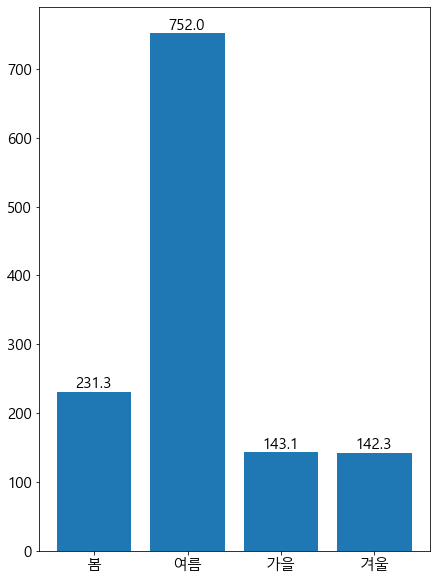

In [17]:
# 2009년 계절별 강수량 비교
plt.figure(figsize=(7,10))
plt.bar(df.index,df[2009])


# plt.text(0-0.2, 231.3,'231.3', fontsize=15)
# #plt.text(0,df.loc['봄'][2009],df.loc['봄'][2009],)
# plt.text(1,df.loc['여름'][2009],df.loc['여름'][2009], fontsize=15)

for idx, rain in enumerate(df[2009]):
    plt.text(idx-0.2, rain+5, rain, fontsize=15)

plt.show()

In [21]:
type(df[2009])

pandas.core.series.Series

In [183]:
# 년도별 봄의 강수량
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


In [185]:
df.loc[['봄']]

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6


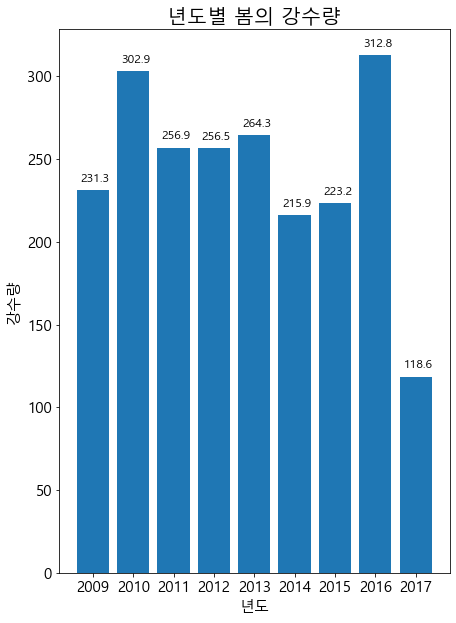

In [214]:
plt.figure(figsize=(7,10))
plt.bar(df.columns, df.loc['봄'])

plt.title('년도별 봄의 강수량')
plt.xlabel('년도')
plt.ylabel('강수량')
plt.xticks(df.columns.astype('int'))
for idx, rain in enumerate(df.loc['봄'],start=2009):
    plt.text(idx-0.3, rain+5, rain, fontsize=12)

plt.show()

In [191]:
df.columns.astype(np.int64)

Int64Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64')

In [47]:
df.loc['봄']

2009    231.3
2010    302.9
2011    256.9
2012    256.5
2013    264.3
2014    215.9
2015    223.2
2016    312.8
2017    118.6
Name: 봄, dtype: float64

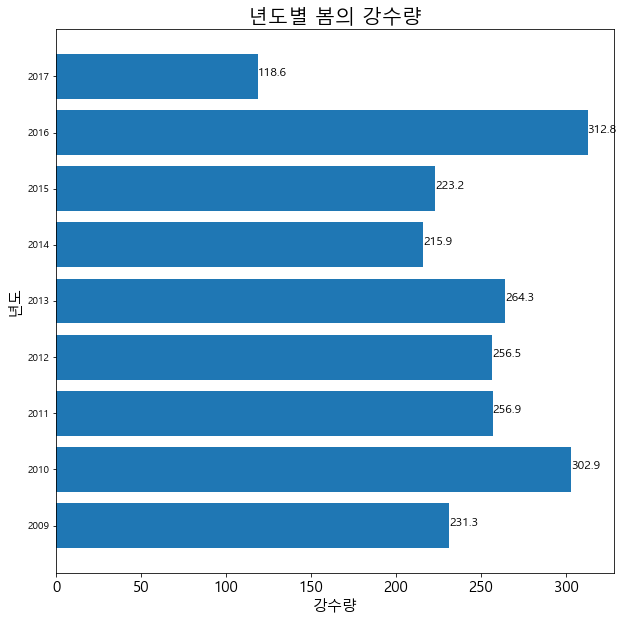

In [50]:
plt.figure(figsize=(10,10))
plt.barh(df.columns, df.loc['봄'])

plt.title('년도별 봄의 강수량')
plt.ylabel('년도')
plt.xlabel('강수량')
plt.yticks(df.columns.astype('int'), size=10)
for idx, rain in zip(df.loc['봄'],df.columns):
    plt.text(idx, rain, idx, fontsize=12)
#

plt.show()

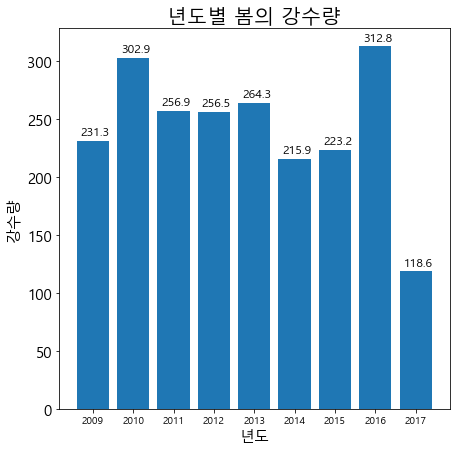

In [237]:
plt.figure(figsize=(7,7))
plt.bar(df.columns, df.loc['봄'])

plt.title('년도별 봄의 강수량')
plt.xlabel('년도')
plt.ylabel('강수량')
#for idx, rain in enumerate(df.loc['봄'],start=2009):
for idx, rain in zip(df.columns, df.loc['봄']):
    plt.text(idx-0.3, rain+5, rain, fontsize=12)
plt.xticks(df.columns.astype('int'), size=10)

plt.show()


In [197]:
dia['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [201]:
clarity_cnt = dia['clarity'].value_counts()
clarity_cnt

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

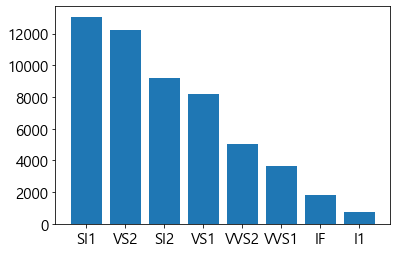

In [203]:
plt.bar(clarity_cnt.index, clarity_cnt)
plt.show()

In [204]:
for idx, rain in enumerate(df.loc['봄']):
    print(idx,rain)

0 231.3
1 302.9
2 256.9
3 256.5
4 264.3
5 215.9
6 223.2
7 312.8
8 118.6
